In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

%load_ext autoreload
%autoreload 2

import re
import sys
import matplotlib
%matplotlib inline
import pandas as pd 
import numpy as np 
import src.model as model 
import src.utils as utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from src.model import *

df = utils.preprocessing()      

regex = re.compile(r"\[|\]|<", re.IGNORECASE)
df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df.columns.values]

# selecting blood test results
columns = list(df.loc[:, 'Leukocytes (10^3/mmc)':'MTHFR Genotype'].columns) 
X = df[columns]
y = df['AE']

/usr/local/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/usr/local/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


['Creatinine (mg/dl)', 'Direct bilirubin (mg/dL)', 'Immunoglobuline G (mg/dl)', 'Beta 1 globulin (%).1', 'Gamma globulin(%)']
{'max_depth': 11, 'max_features': 0.5, 'min_samples_leaf': 20, 'min_samples_split': 20, 'n_estimators': 50, 'score': 'neg_mean_squared_error', 'train_size': 0.7}
==> MSE: 176.2374965809187
==> R2": 0.3928554013981279



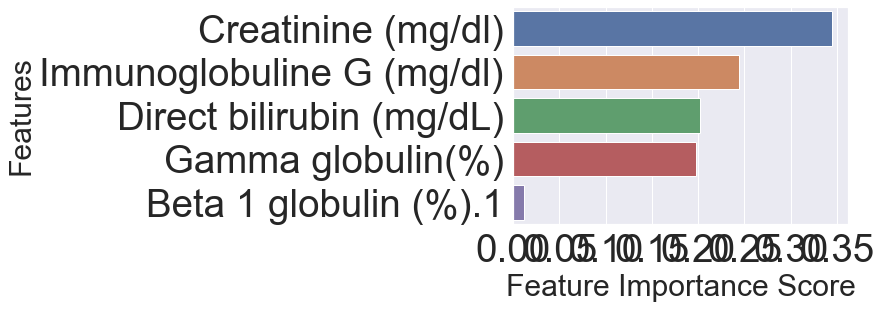

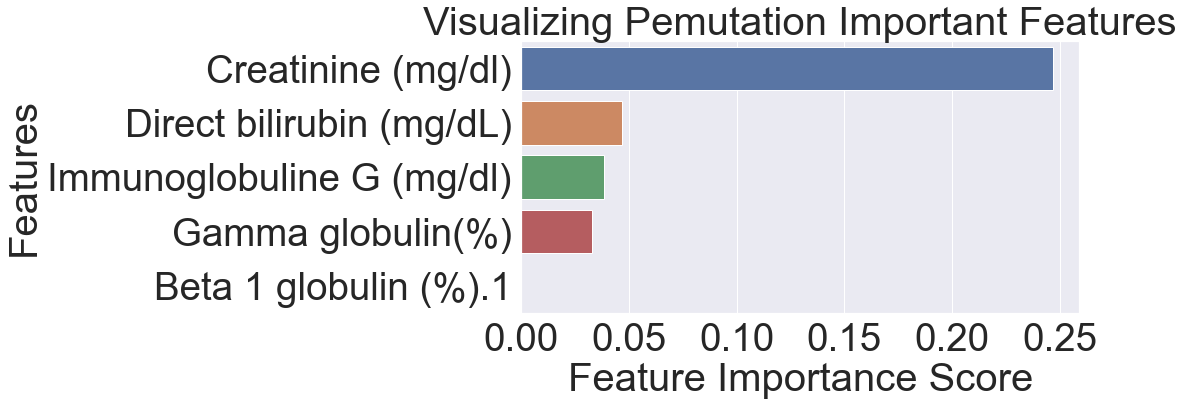

In [2]:
params = {}

features = []

score = 'neg_mean_squared_error'

forest = utils.feature_importance_model(RandomForest, X, y, params=params, features=features, score=score)
forest.plot_importance()
forest.plot_permutation_importance()

In [3]:
target_var = 'Age (months)'
#df = df.sort_values("Age (months)")  # for plotting purposes
df = utils.effect_mitigation(df[columns + [target_var, 'AE']])
X = df[columns]
y = df['AE']

/Users/federicobaldo/Documents/repositories/ML4downsyndrome/src/utils.py:237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column] / Z.ravel()
/Users/federicobaldo/Documents/repositories/ML4downsyndrome/src/utils.py:237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column] / Z.ravel()
/Users/federicobaldo/Documents/repositories/ML4downsyndrome/src/utils.py:237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

/Users/federicobaldo/Documents/repositories/ML4downsyndrome/src/utils.py:237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column] / Z.ravel()
/Users/federicobaldo/Documents/repositories/ML4downsyndrome/src/utils.py:237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column] / Z.ravel()
/Users/federicobaldo/Documents/repositories/ML4downsyndrome/src/utils.py:237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

/Users/federicobaldo/Documents/repositories/ML4downsyndrome/src/utils.py:237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column] / Z.ravel()
/Users/federicobaldo/Documents/repositories/ML4downsyndrome/src/utils.py:237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column] / Z.ravel()
/Users/federicobaldo/Documents/repositories/ML4downsyndrome/src/utils.py:237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

/Users/federicobaldo/Documents/repositories/ML4downsyndrome/src/utils.py:237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column] / Z.ravel()


['CD3+CD4+ (%)', 'Immunoglobuline A (mg/dl)', 'Beta 1 globulin (%)']
{'max_depth': 7, 'max_features': 0.3, 'min_samples_leaf': 20, 'min_samples_split': 30, 'n_estimators': 100, 'score': 'neg_mean_squared_error', 'train_size': 0.7}
==> MSE: 0.004484795551858843
==> R2": 0.09355793622273834



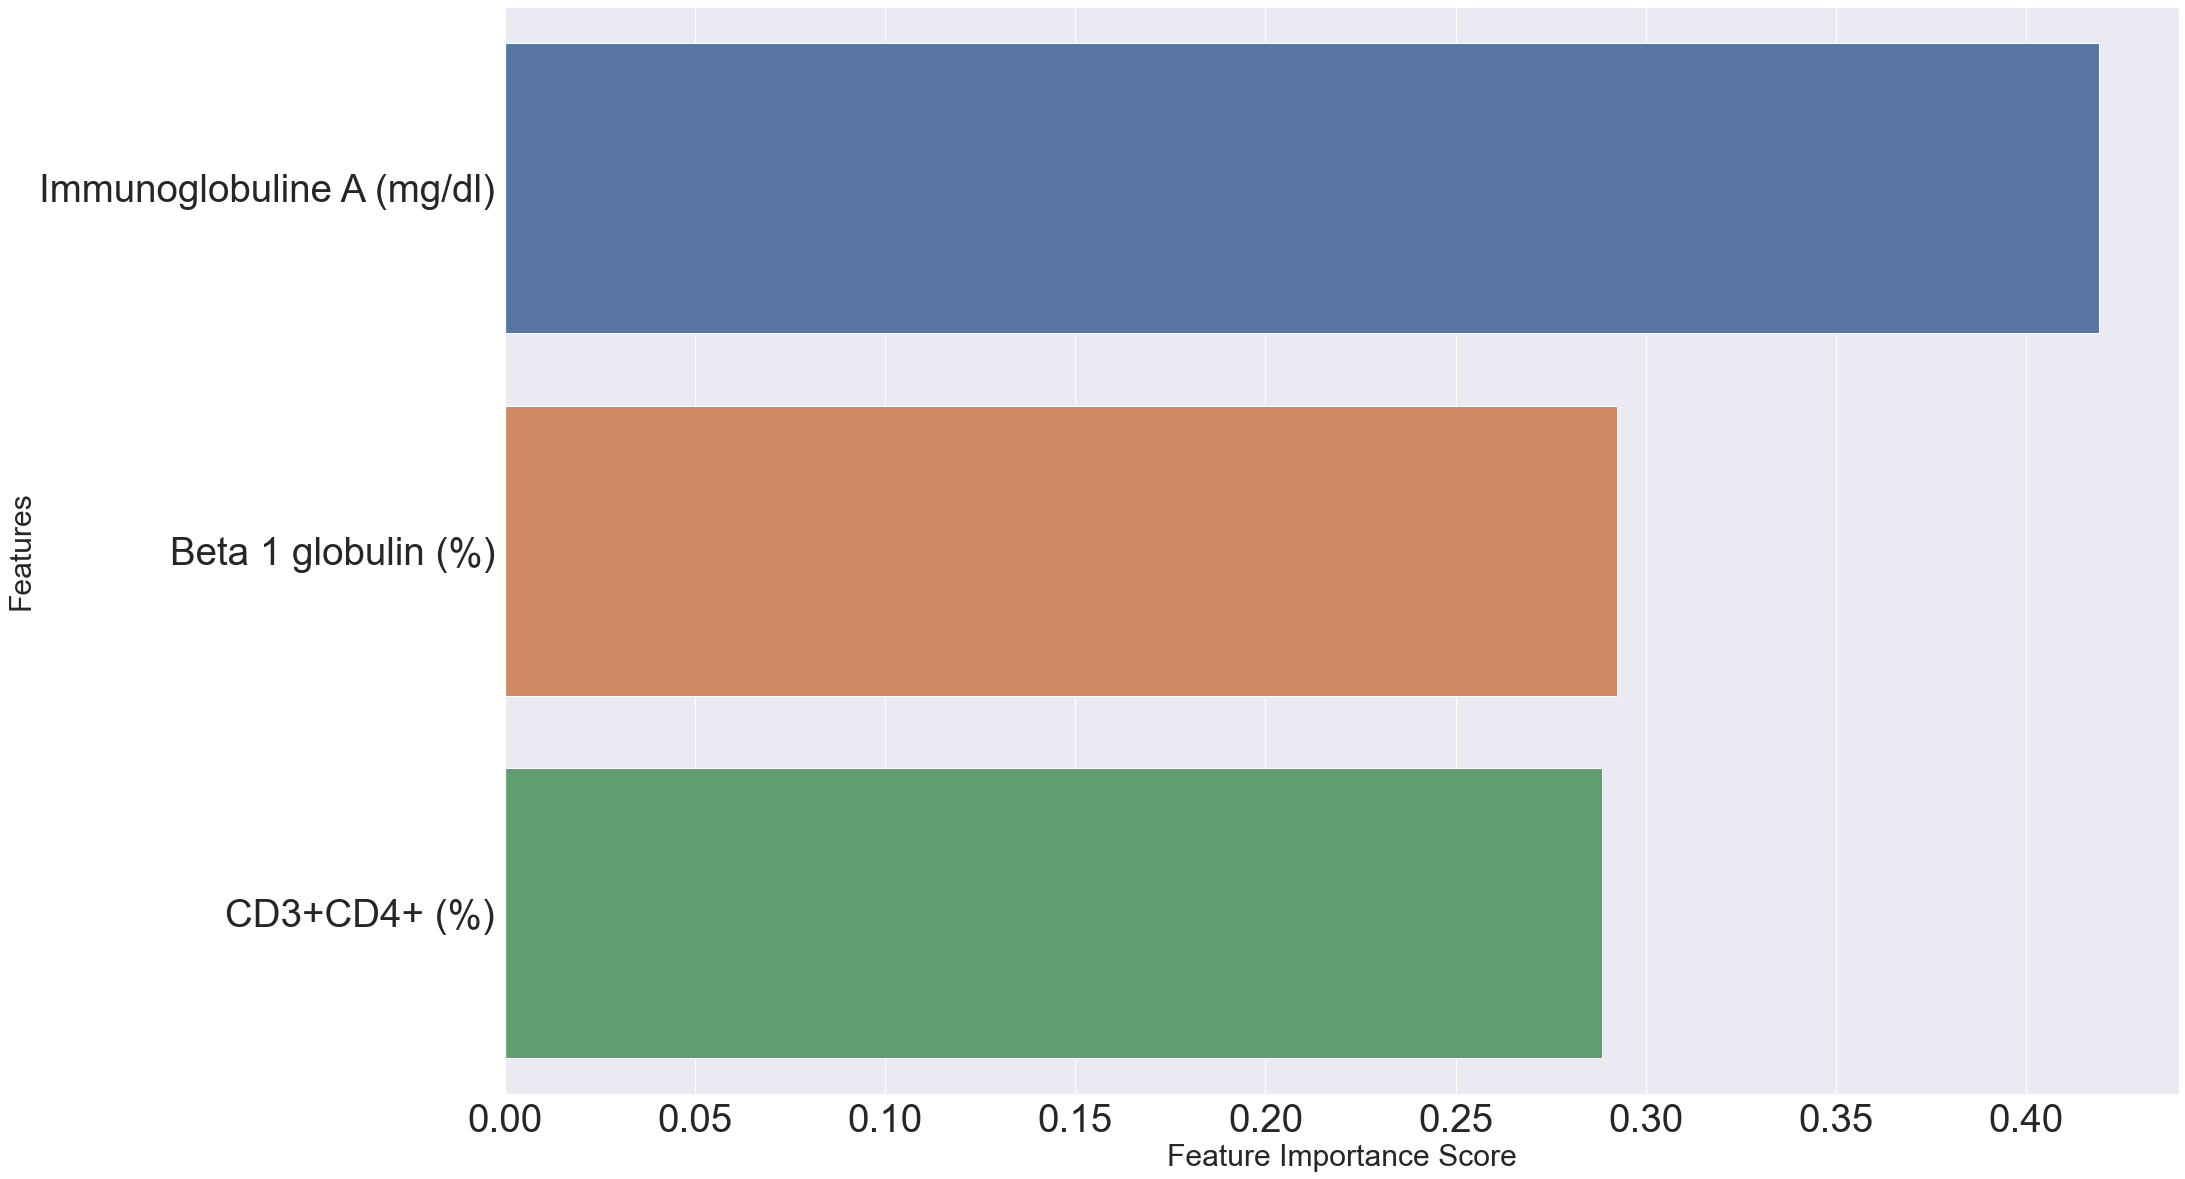

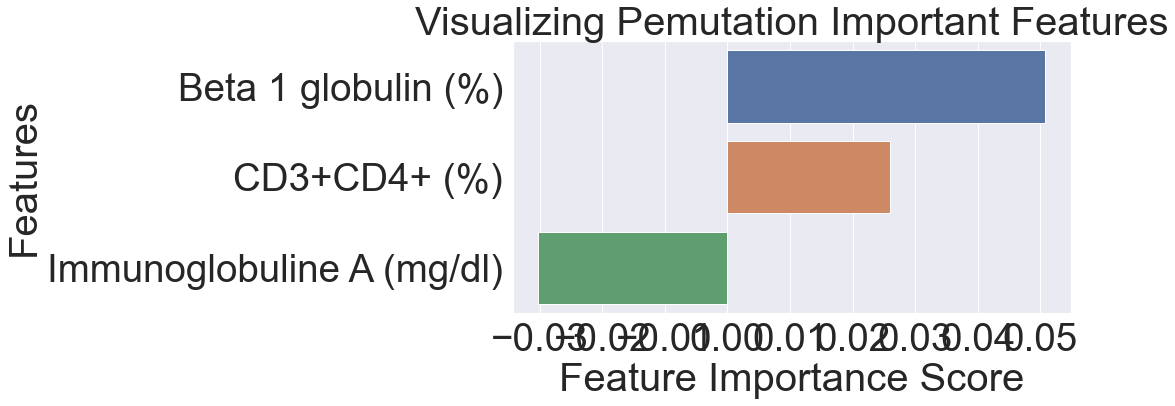

In [4]:
params = {}

features = []

score = 'neg_mean_squared_error'

forest = utils.feature_importance_model(RandomForest, X, y, params=params, features=features, score=score)
forest.plot_importance()
forest.plot_permutation_importance()

In [5]:
#df = utils.data_augmentation(df, 'QI G+W')                   
#utils.save(df, './data/aug_downsyndrom')      

df = pd.read_csv('./data/aug_downsyndrom.csv', delimiter=';')

df = utils.treat_nan(df)

X = df[columns]
y = df['AE']
y_cat = df['AE_cat']

/usr/local/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


['Leukocytes (10^3/mmc)', 'Hematocrit (%)', 'MCH-Mean corpuscular hemoglobin (pg)', 'MCHC-Mean corpuscular hemoglobin concentration (g/dL)', 'RDWRed blood cells distribution width (%)', 'HDW-Hemoglobin distribution width (g/dL)', 'Neutrophils (10^3/mmc)', 'Lymphocytes  (10^3/mmc)', 'CD3+CD4+ (%)', 'CD56+CD16+CD3- ( NK ) (%)', 'CD19+ ( PAN B ) (%)', 'Creatinine (mg/dl)', 'Triglycerides (mg/dL)', 'Cholesterol HDL (mg/dl)', 'Potassium (mmol/L)', 'Magnesium (mg/dL)', 'Albumin', 'Direct bilirubin (mg/dL)', 'Indirect bilirubin (mg/dL)', 'ALT-alanine Aminotransferase  (GPT-glutamic-pyruvic transaminase) (U/L)', 'Iron (microgr/dL)', 'Folic acid (ng/mL)', 'Vitamin B12 (pg/ml)', 'Immunoglobuline A (mg/dl)', 'Immunoglobuline M (mg/dl)', 'Thyrotropin (microIU/ml)', 'Anti-thyroglobulin Antibody (AbTg) (UI/mL)', 'TPO-Thyroid peroxidase antibodies (UI/mL)', 'Albumin (%)', 'Alpha 1 globulin (%)', 'Beta 1 globulin (%).1', 'MTHFR Genotype']
{'max_depth': 13, 'max_features': 0.6, 'min_samples_leaf': 20, 

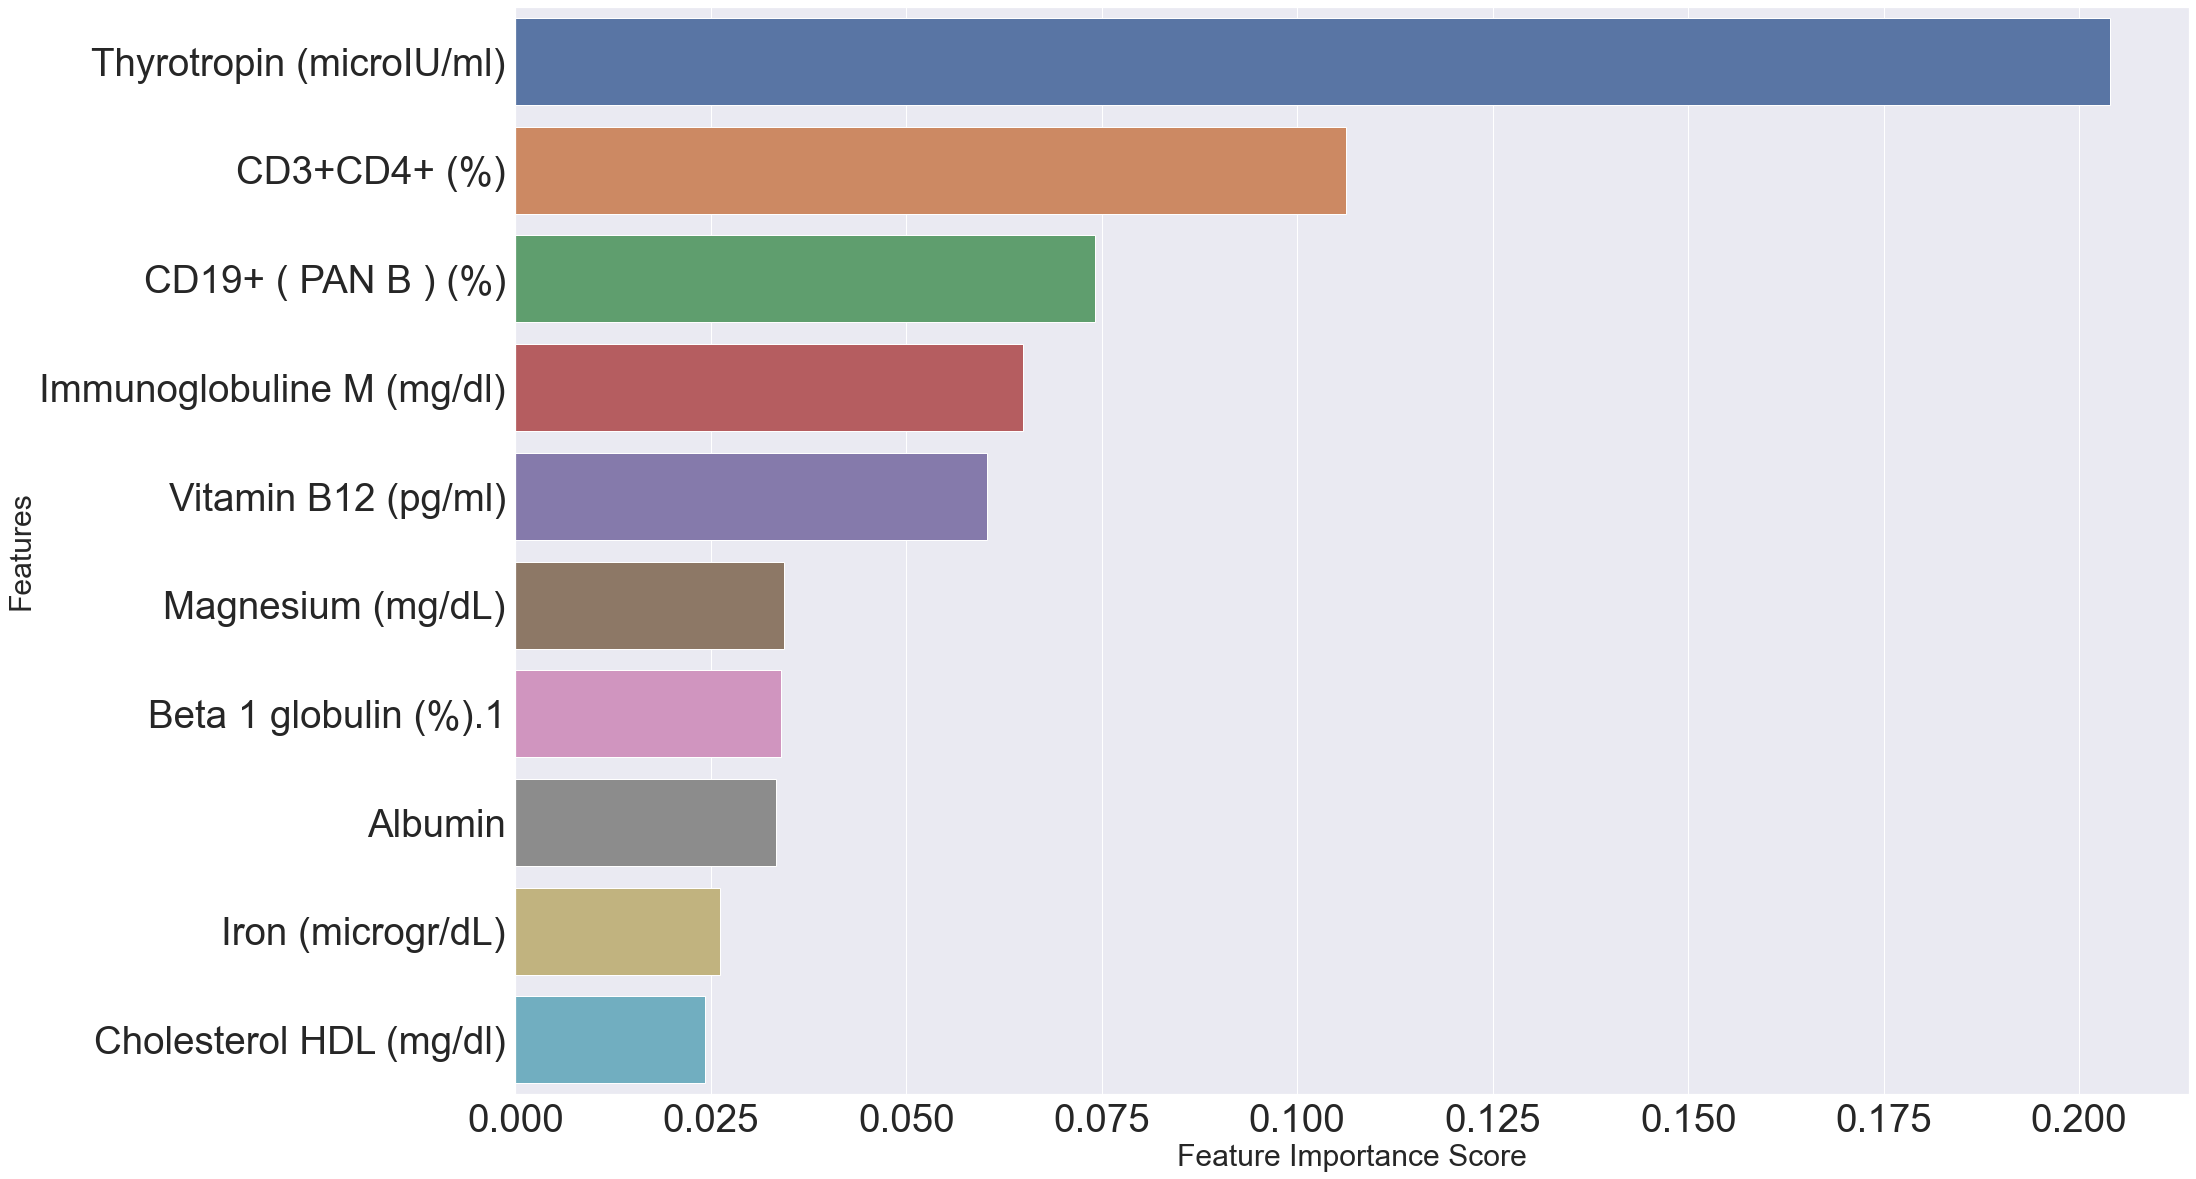

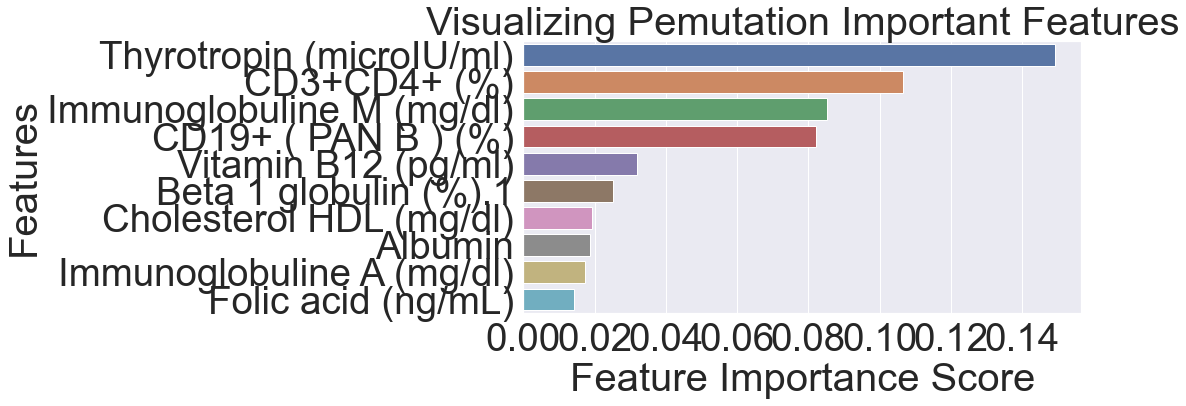

In [6]:
params = {}

features = []

score = 'neg_mean_squared_error'

forest = utils.feature_importance_model(RandomForest, X, y, params=params, features=features, score=score)
forest.plot_importance()
forest.plot_permutation_importance()

['Leukocytes (10^3/mmc)', 'Erythrocytes (10^6/mmc)', 'HGB-Hemoglobin (g/dL)', 'Hematocrit (%)', 'MCV-Mean corpuscular volume (fL)', 'MCH-Mean corpuscular hemoglobin (pg)', 'MCHC-Mean corpuscular hemoglobin concentration (g/dL)', 'RDWRed blood cells distribution width (%)', 'HDW-Hemoglobin distribution width (g/dL)', 'Neutrophils (10^3/mmc)', 'Lymphocytes  (10^3/mmc)', 'Monocytes  (10^3/mmc)', 'Eosinophils (10^3/mmc)', 'Basophils (10^3/mmc)', 'Platelet count (10^3/microL)', 'MPV-Mean platelet volume (fL)', 'CD3+ ( PAN T ) (%)', 'CD3+CD4+ (%)', 'CD3+CD4+ (Helper) (mmc)', 'CD3+CD8+ (%)', 'CD4+/CD8+', 'CD56+CD16+CD3- ( NK ) (%)', 'CD19+ ( PAN B ) (%)', 'Glucose (mg/dL)', 'HbA1c glycated hemoglobin (mmol/mol)', 'Fructosamine (micromol/L)', 'Urea (mg/dl)', 'Creatinine (mg/dl)', 'Uric acid (mg/dL)', 'Total cholesterol (mg/dL)', 'Triglycerides (mg/dL)', 'Cholesterol HDL (mg/dl)', 'Sodium (mmol/L)', 'Potassium (mmol/L)', 'Chloride (mmol/L)', 'Zinc (micromol/L)', 'Magnesium (mg/dL)', 'Total prot

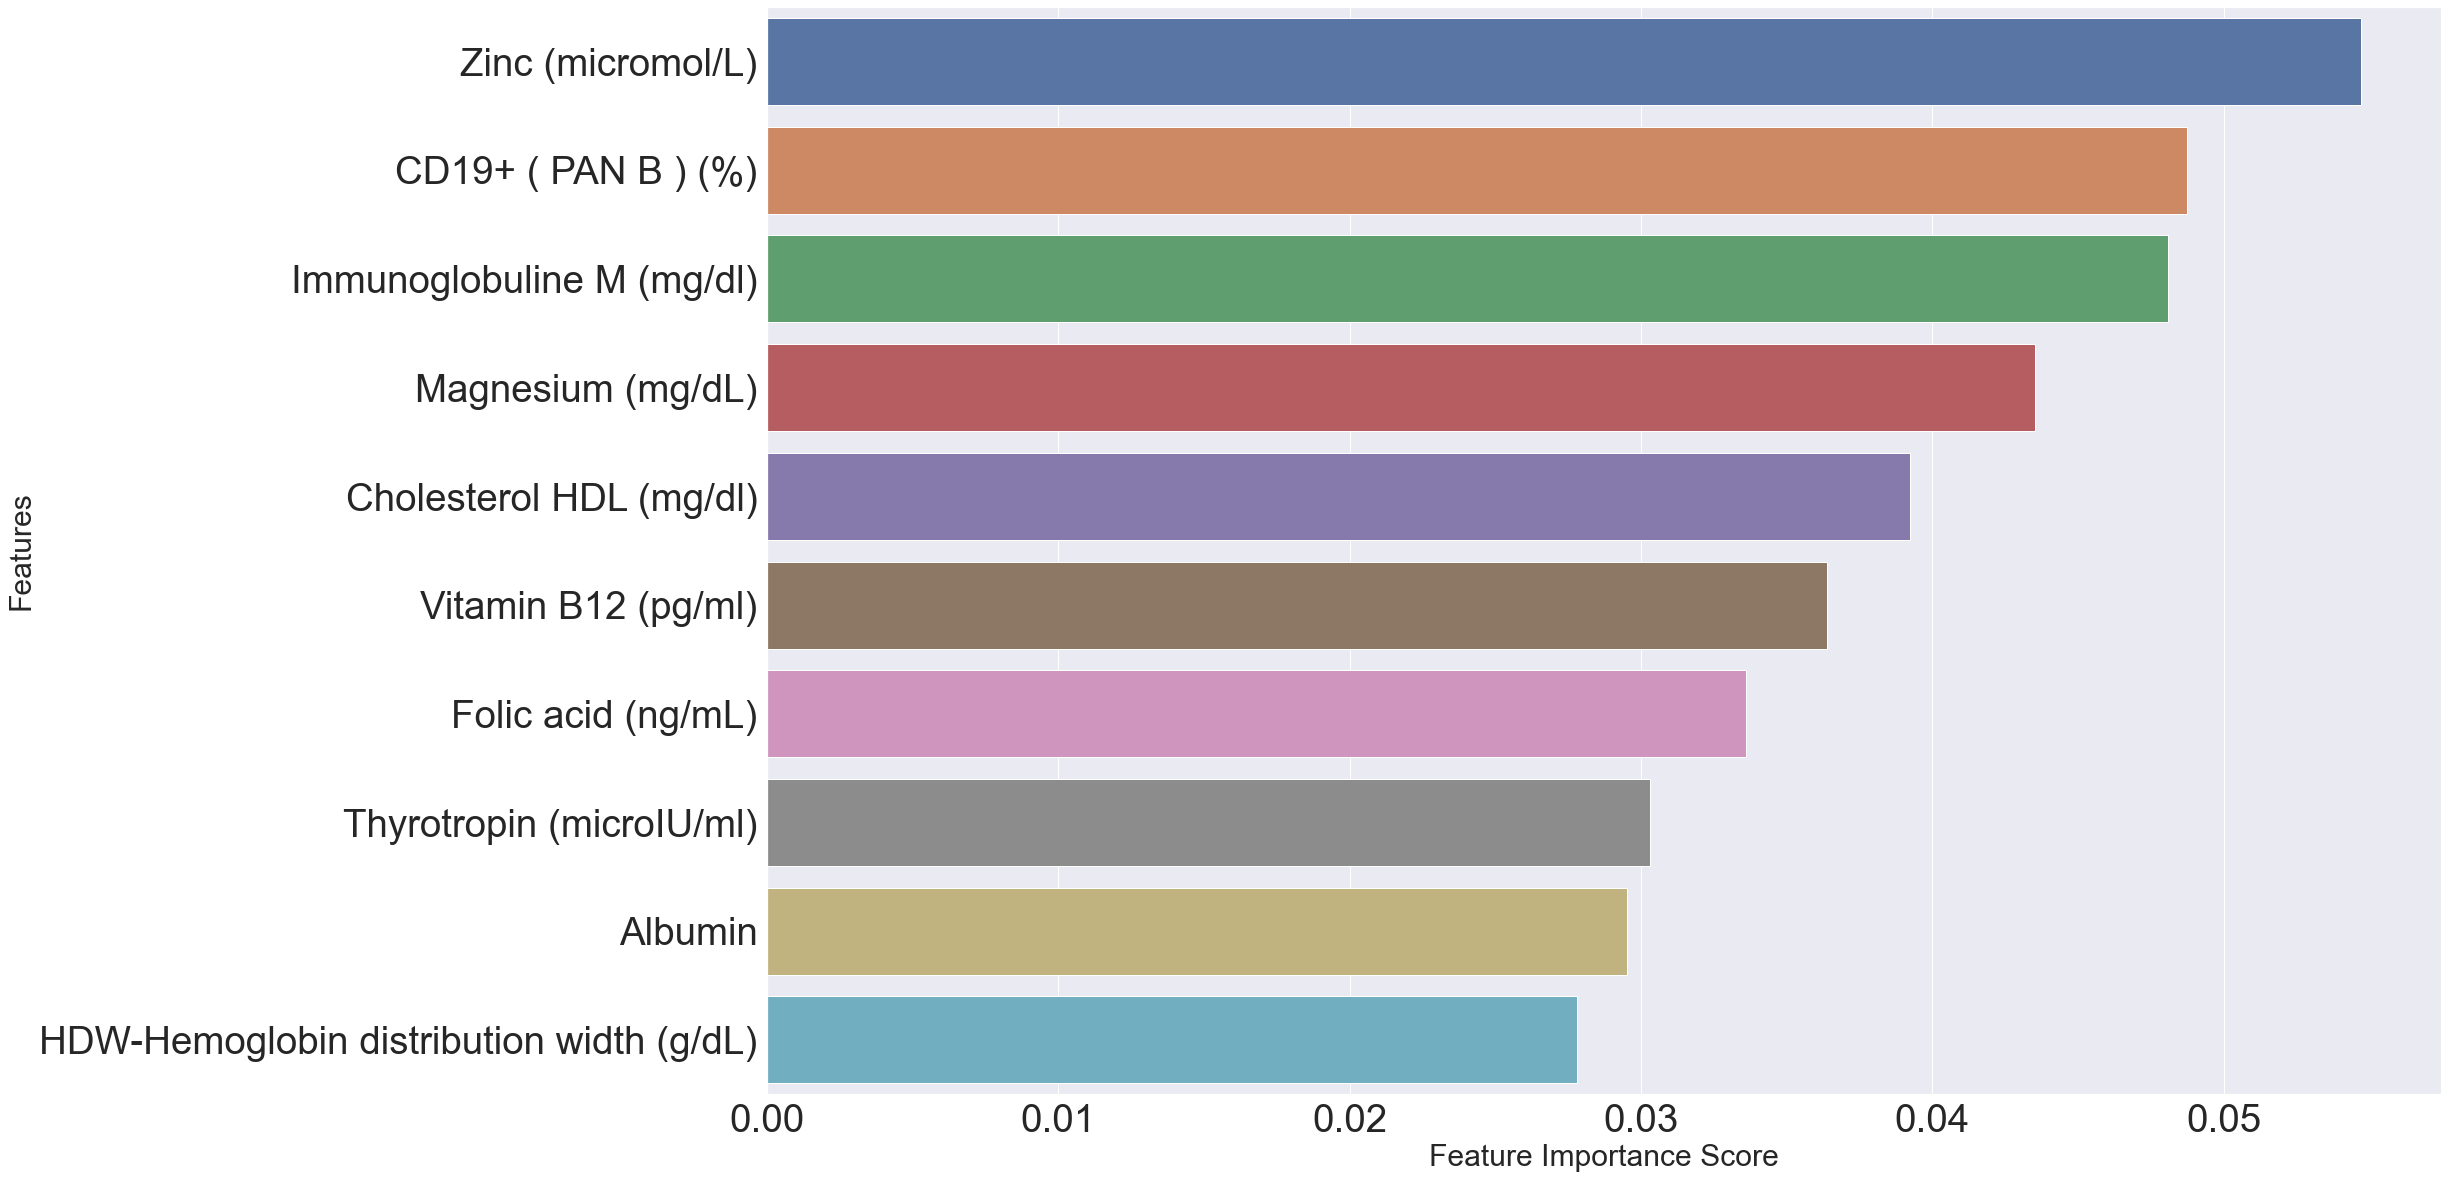

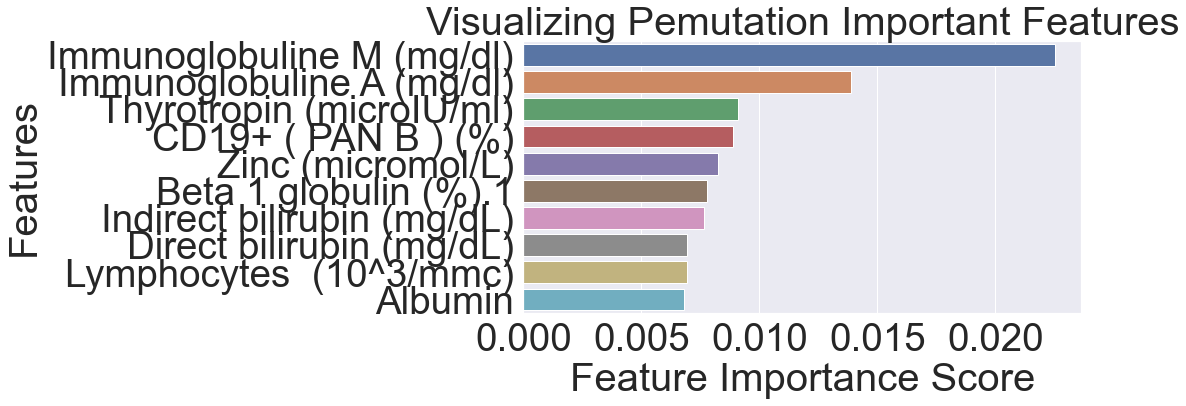

In [7]:
params = {}

features = []

score = 'accuracy'

forest = utils.feature_importance_model(RandomForest, X, y_cat, params=params, features=features, score=score)
forest.plot_importance()
forest.plot_permutation_importance()

In [8]:
target_var = 'Age (months)'
#df = df.sort_values("Age (months)")  # for plotting purposes
df = utils.effect_mitigation(df[columns + [target_var, 'AE']])
X = df[columns]
y = df['AE']
#y_cat = df['AE_cat']

/Users/federicobaldo/Documents/repositories/ML4downsyndrome/src/utils.py:237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column] / Z.ravel()
/Users/federicobaldo/Documents/repositories/ML4downsyndrome/src/utils.py:237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column] / Z.ravel()
/Users/federicobaldo/Documents/repositories/ML4downsyndrome/src/utils.py:237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

/Users/federicobaldo/Documents/repositories/ML4downsyndrome/src/utils.py:237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column] / Z.ravel()
/Users/federicobaldo/Documents/repositories/ML4downsyndrome/src/utils.py:237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column] / Z.ravel()
/Users/federicobaldo/Documents/repositories/ML4downsyndrome/src/utils.py:237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

/Users/federicobaldo/Documents/repositories/ML4downsyndrome/src/utils.py:237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column] / Z.ravel()
/Users/federicobaldo/Documents/repositories/ML4downsyndrome/src/utils.py:237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column] / Z.ravel()
/Users/federicobaldo/Documents/repositories/ML4downsyndrome/src/utils.py:237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

/Users/federicobaldo/Documents/repositories/ML4downsyndrome/src/utils.py:237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column] / Z.ravel()
/Users/federicobaldo/Documents/repositories/ML4downsyndrome/src/utils.py:237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column] / Z.ravel()
/Users/federicobaldo/Documents/repositories/ML4downsyndrome/src/utils.py:237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

['Leukocytes (10^3/mmc)', 'Hematocrit (%)', 'MCH-Mean corpuscular hemoglobin (pg)', 'MCHC-Mean corpuscular hemoglobin concentration (g/dL)', 'RDWRed blood cells distribution width (%)', 'HDW-Hemoglobin distribution width (g/dL)', 'Neutrophils (10^3/mmc)', 'Lymphocytes  (10^3/mmc)', 'Platelet count (10^3/microL)', 'CD3+CD4+ (%)', 'CD56+CD16+CD3- ( NK ) (%)', 'CD19+ ( PAN B ) (%)', 'Creatinine (mg/dl)', 'Triglycerides (mg/dL)', 'Cholesterol HDL (mg/dl)', 'Potassium (mmol/L)', 'Magnesium (mg/dL)', 'Albumin', 'Direct bilirubin (mg/dL)', 'Indirect bilirubin (mg/dL)', 'ALT-alanine Aminotransferase  (GPT-glutamic-pyruvic transaminase) (U/L)', 'Iron (microgr/dL)', 'Folic acid (ng/mL)', 'Vitamin B12 (pg/ml)', 'Immunoglobuline A (mg/dl)', 'Immunoglobuline M (mg/dl)', 'Thyrotropin (microIU/ml)', 'Anti-thyroglobulin Antibody (AbTg) (UI/mL)', 'TPO-Thyroid peroxidase antibodies (UI/mL)', 'Albumin (%)', 'Alpha 1 globulin (%)', 'Beta 1 globulin (%).1', 'MTHFR Genotype']
{'max_depth': 13, 'max_features

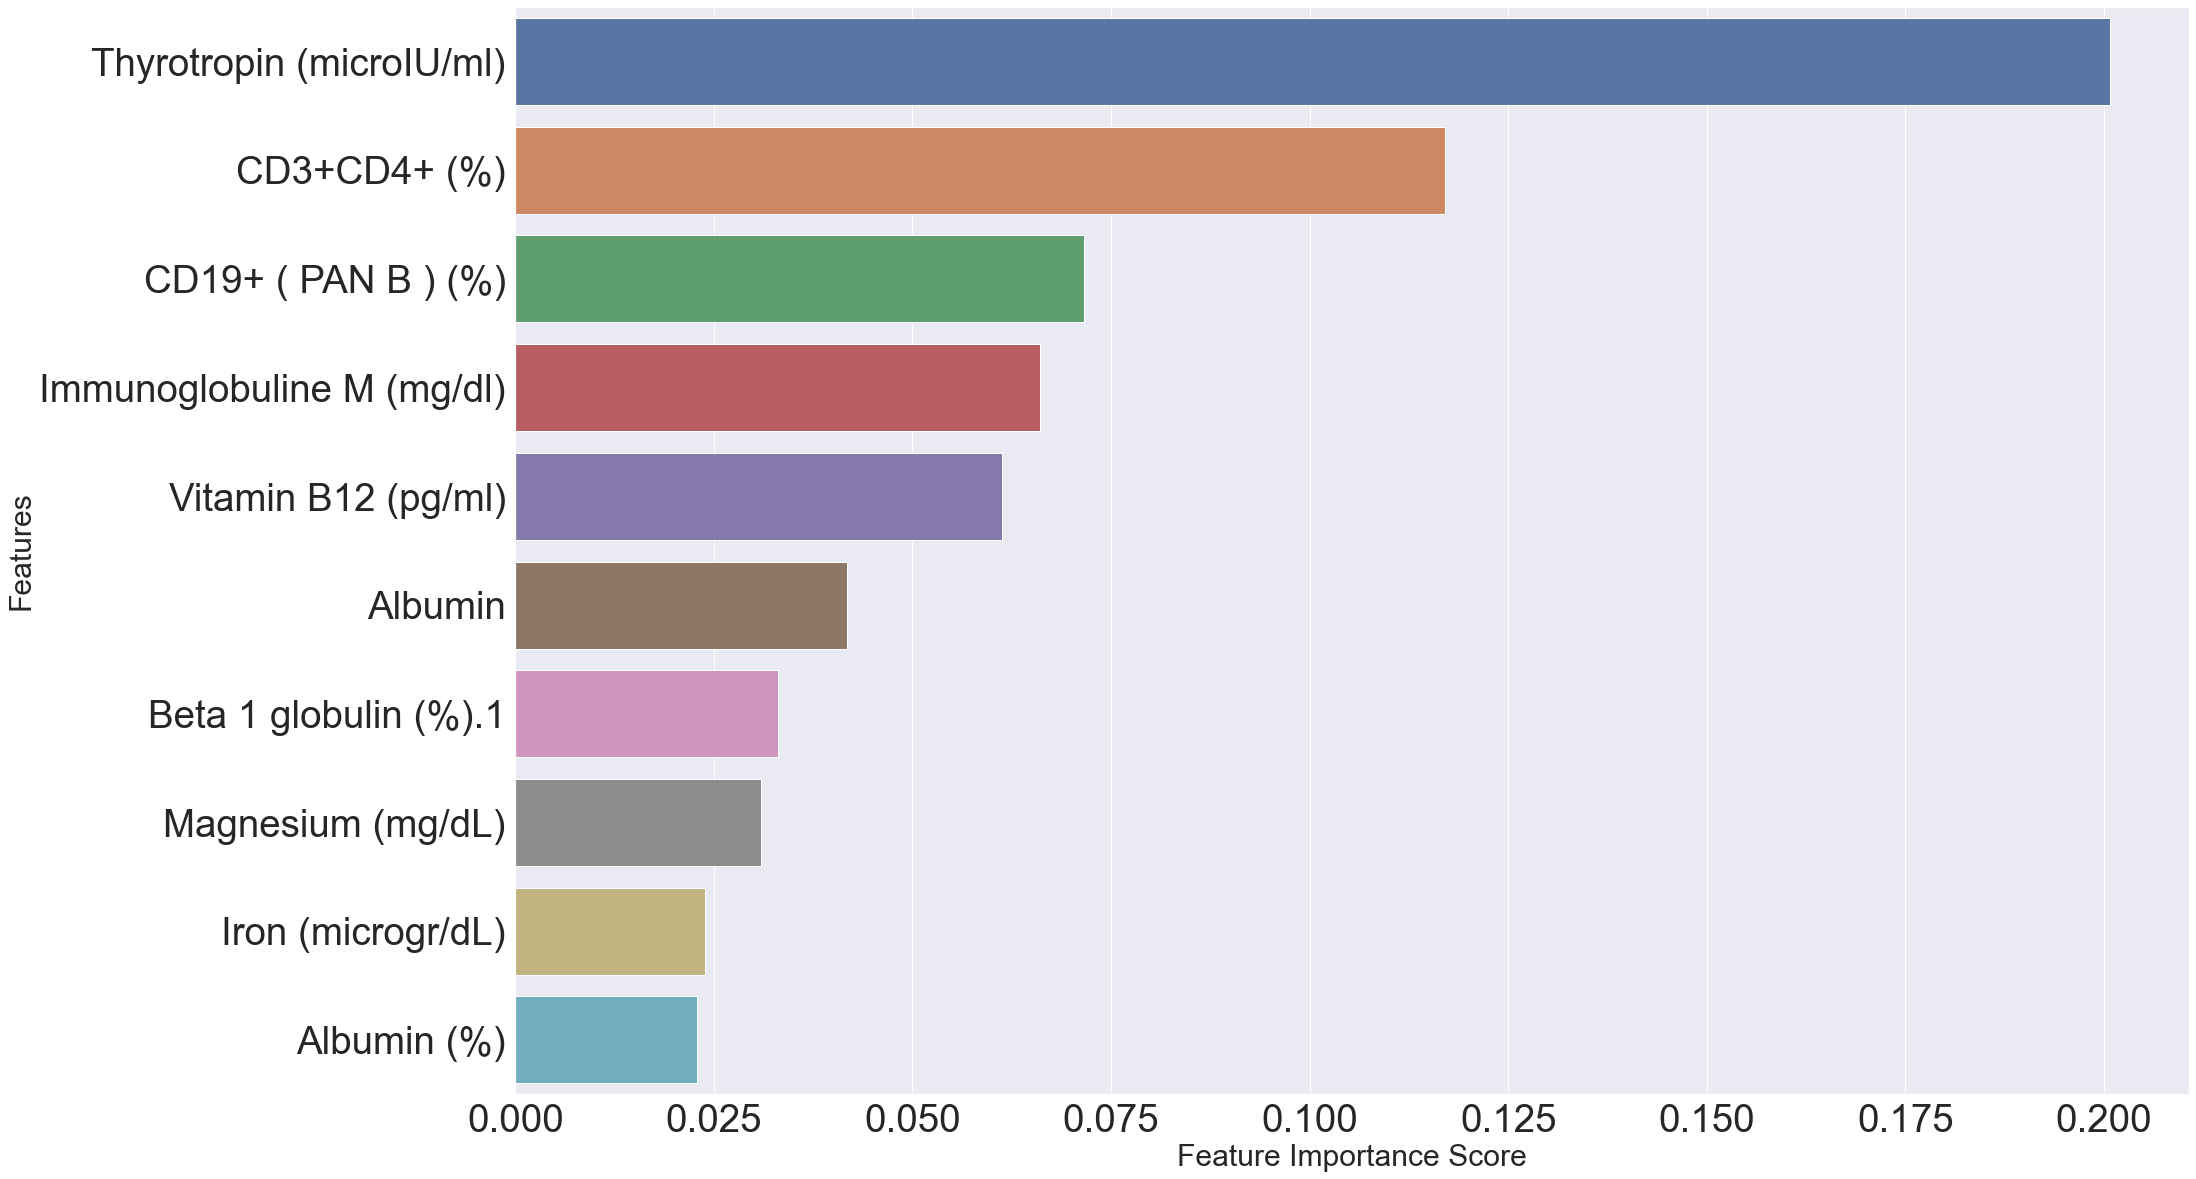

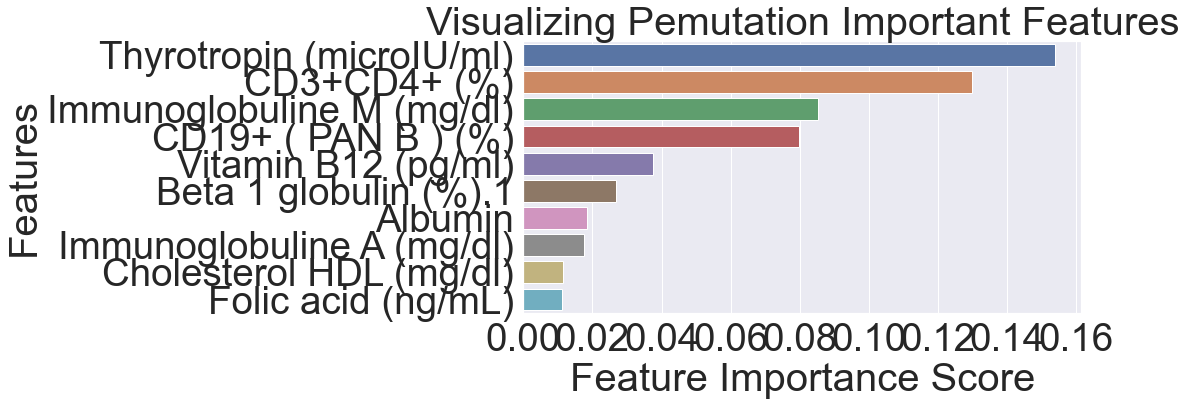

In [9]:
params = {}

features = []

score = 'neg_mean_squared_error'

forest = utils.feature_importance_model(RandomForest, X, y, params=params, features=features, score=score)
forest.plot_importance()
forest.plot_permutation_importance()

['Leukocytes (10^3/mmc)', 'Erythrocytes (10^6/mmc)', 'HGB-Hemoglobin (g/dL)', 'Hematocrit (%)', 'MCV-Mean corpuscular volume (fL)', 'MCH-Mean corpuscular hemoglobin (pg)', 'MCHC-Mean corpuscular hemoglobin concentration (g/dL)', 'RDWRed blood cells distribution width (%)', 'HDW-Hemoglobin distribution width (g/dL)', 'Neutrophils (10^3/mmc)', 'Lymphocytes  (10^3/mmc)', 'Monocytes  (10^3/mmc)', 'Eosinophils (10^3/mmc)', 'Basophils (10^3/mmc)', 'Platelet count (10^3/microL)', 'MPV-Mean platelet volume (fL)', 'CD3+ ( PAN T ) (%)', 'CD3+CD4+ (%)', 'CD3+CD4+ (Helper) (mmc)', 'CD3+CD8+ (%)', 'CD4+/CD8+', 'CD56+CD16+CD3- ( NK ) (%)', 'CD19+ ( PAN B ) (%)', 'Glucose (mg/dL)', 'HbA1c glycated hemoglobin (mmol/mol)', 'Fructosamine (micromol/L)', 'Urea (mg/dl)', 'Creatinine (mg/dl)', 'Uric acid (mg/dL)', 'Total cholesterol (mg/dL)', 'Triglycerides (mg/dL)', 'Cholesterol HDL (mg/dl)', 'Sodium (mmol/L)', 'Potassium (mmol/L)', 'Chloride (mmol/L)', 'Zinc (micromol/L)', 'Magnesium (mg/dL)', 'Total prot

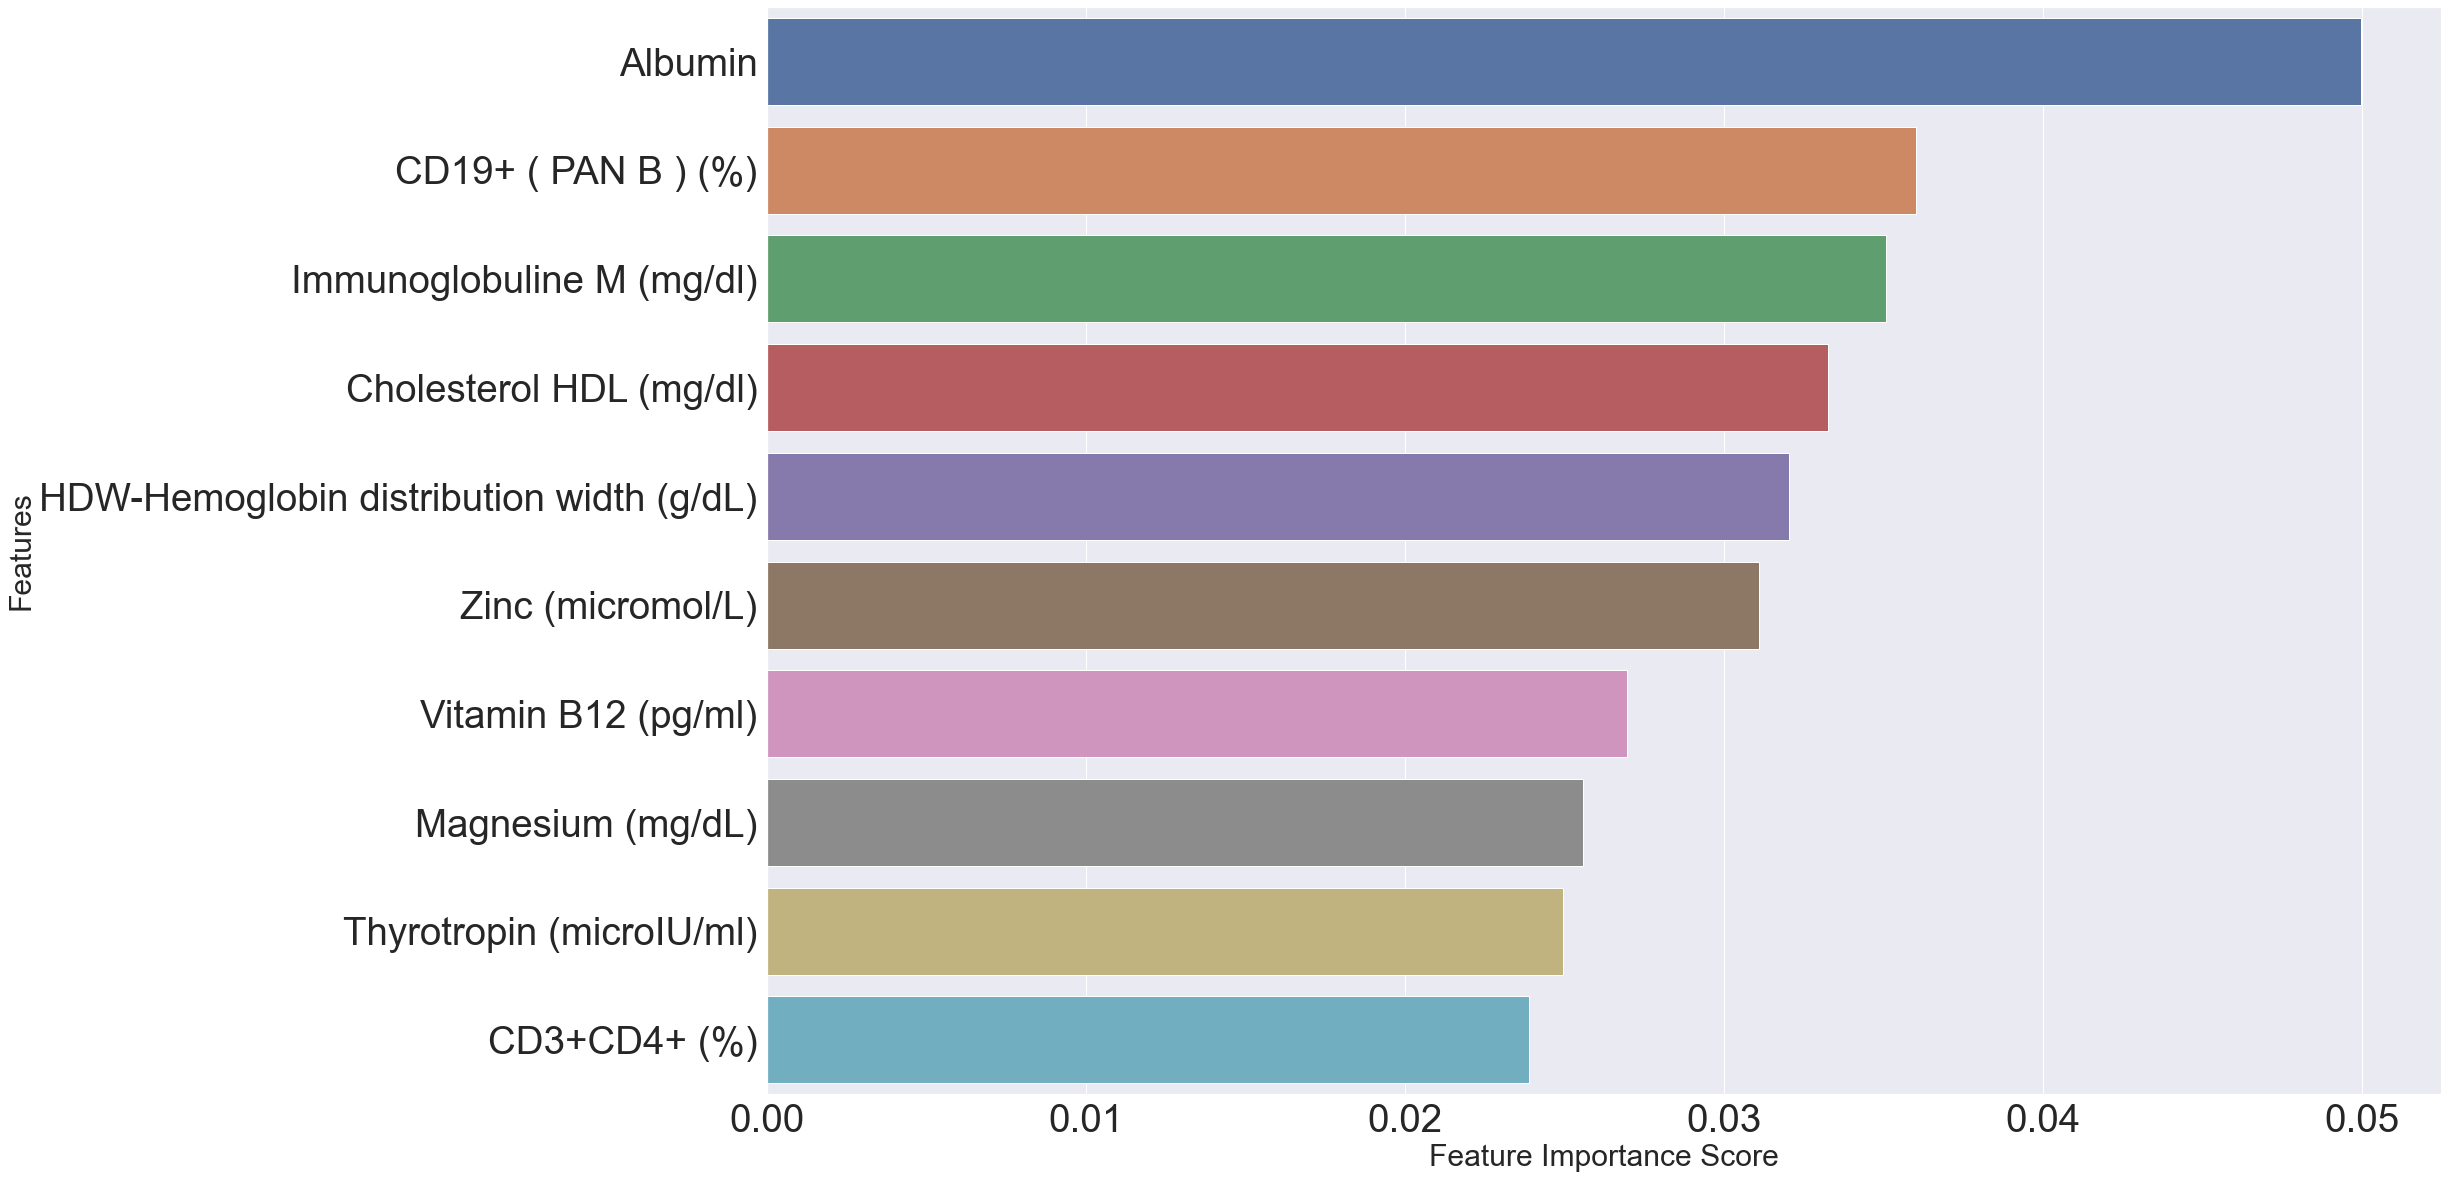

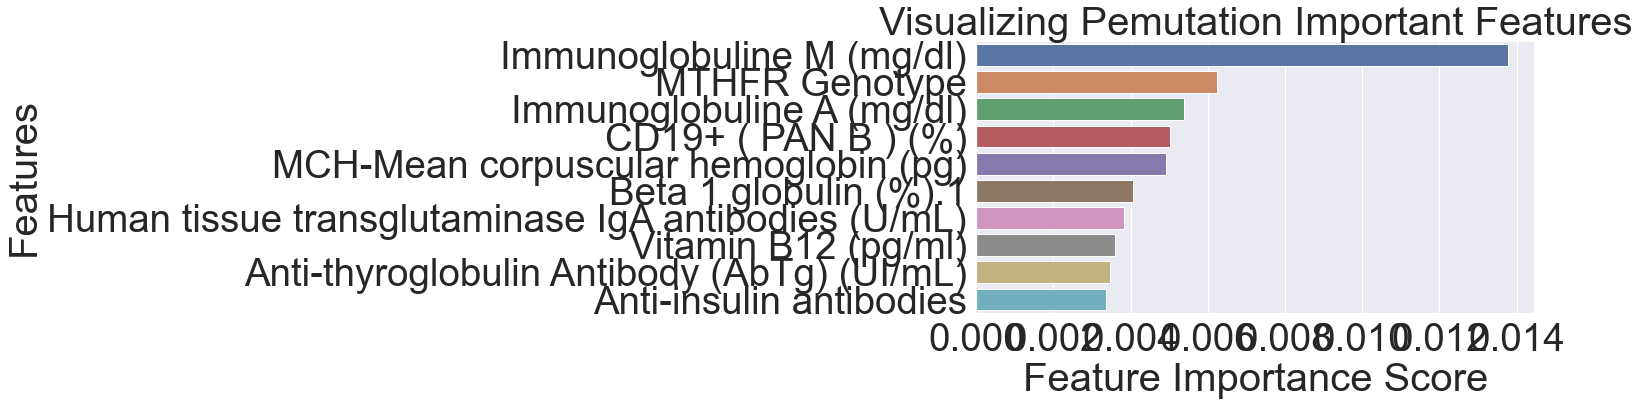

In [11]:
params = {}

features = []

score = 'accuracy'

forest = utils.feature_importance_model(RandomForest, X, y_cat, params=params, features=features, score=score)
forest.plot_importance()
forest.plot_permutation_importance()